In [57]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)

ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
gigecon_df = pd.merge(ride_data_df, city_data_df, on="city")
# Display the data table for preview
gigecon_df.head(30)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban
5,Lake Jonathanshire,2018-04-06 11:30:32,16.84,6164453571846,5,Urban
6,Lake Jonathanshire,2018-03-21 00:18:34,37.95,8353656732934,5,Urban
7,Lake Jonathanshire,2018-01-28 00:07:00,5.67,9756573174778,5,Urban
8,Lake Jonathanshire,2018-01-24 12:24:22,34.65,3319117904437,5,Urban
9,Lake Jonathanshire,2018-03-24 16:27:49,14.94,1670908453476,5,Urban


In [64]:
city_groups = gigecon_df.groupby("city")["driver_count"].count()
#city_groups("[ride_id]").value_counts
city_groups.head(50)

city
Amandaburgh           18
Barajasview           22
Barronchester         16
Bethanyland           18
Bradshawfurt          10
Brandonfort           19
Carriemouth           27
Christopherfurt       27
Colemanland           22
Davidfurt             17
Deanville             19
East Aaronbury         9
East Danielview       17
East Kaylahaven       29
East Kentstad         13
East Marymouth        27
Erikaland             12
Garzaport              3
Grahamburgh           25
Grayville             15
Harringtonfort         6
Huntermouth           24
Hurleymouth           28
Jerryton              25
Jessicaport            6
Johnton               21
Joneschester          25
Josephside            27
Justinberg            30
Karenberg             17
Karenside             28
Lake Ann              12
Lake Danielberg       26
Lake Jamie             6
Lake Jonathanshire    24
Lake Latoyabury       11
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lake Scottton       

In [65]:
city_groups = gigecon_df.groupby("type")["city"].count()
#city_groups("[ride_id]").value_counts
city_groups.head(50)

type
Rural        125
Suburban     625
Urban       1625
Name: city, dtype: int64

In [11]:
gigecon_df.shape

(2375, 6)

In [12]:
gigecon_df.nunique()

city             120
date            2375
fare            1841
ride_id         2375
driver_count      52
type               3
dtype: int64

In [30]:
ride_count = gigecon_df["ride_id"].count()
ride_count

2375

In [14]:
total_fare = gigecon_df["fare"].sum()
total_fare

63538.64

In [15]:
gigecon_df["driver_count"].unique().sum()

1740

In [31]:
ride_type_df = pd.DataFrame(gigecon_df)
ride_type_group = ride_type_df.groupby(["type"])
ride_type_breakdown = pd.DataFrame({"Total Count":ride_type_group["type"].count(),"Percentage of Total Rides":ride_type_group["type"].count()/ride_count*100})



ride_type_breakdown.head()

,Total Count,Percentage of Total Rides
type,,
Rural,125,5.263158
Suburban,625,26.315789
Urban,1625,68.421053


In [17]:
colors = ["lightcoral", "lightskyblue", "gold"]

## Bubble Plot of Ride Sharing Data

In [18]:
# Obtain the x and y coordinates for each of the three city types
urb_x = 
urb_y =
urb_z = 

urb_x = 
urb_y =
urb_z =

urb_x = 
urb_y =
urb_z =

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [19]:
# Show plot
plt.show()

## Total Fares by City Type

In [20]:
# Calculate Type Percents

# Calculate Ride Percents
ride_fare_df = pd.DataFrame(gigecon_df)
ride_fare_group = ride_fare_df.groupby(["type"])
ride_fare_breakdown = pd.DataFrame({"Total Spend":ride_fare_group["fare"].sum(),"Percentage of Total Spend":ride_fare_group["fare"].sum()/total_fare*100})

ride_fare_breakdown.head()


,Total Spend,Percentage of Total Spend
type,,
Rural,4327.93,6.811493
Suburban,19356.33,30.463872
Urban,39854.38,62.724635


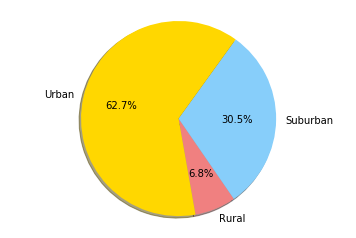

In [32]:
# Build Pie Chart
plt.pie(ride_fare_breakdown["Percentage of Total Spend"], labels = ride_type_breakdown.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.show()
# Save Figure

## Total Rides by City Type

In [33]:
# Calculate Ride Percents
ride_type_df = pd.DataFrame(gigecon_df)
ride_type_group = ride_type_df.groupby(["type"])
ride_type_breakdown = pd.DataFrame({"Total Count":ride_type_group["type"].count(),"Percentage of Total Rides":ride_type_group["type"].count()/ride_count*100})

ride_type_breakdown.head()

,Total Count,Percentage of Total Rides
type,,
Rural,125,5.263158
Suburban,625,26.315789
Urban,1625,68.421053


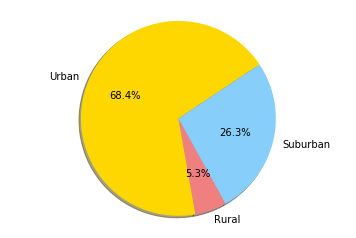

In [34]:
# Build Pie Chart
plt.pie(ride_type_breakdown["Percentage of Total Rides"], labels = ride_type_breakdown.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.show()
# Save Figure


In [24]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [67]:
# Calculate Driver Percents
driver_total_df = pd.DataFrame(gigecon_df, ["type"], ["driver_count"])
driver_total_df.head()
#driver_total_group = driver_total_df.groupby(["type"])
#driver_total_group.head()
#driver_total_breakdown = pd.DataFrame({"Total Drivers":ride_fare_group["driver_count"].sum(),"Percentage of Total Drivers":ride_fare_group["fare"].sum()/total_fare*100})

#driver_total_breakdown.head()

,driver_count
type,NaN


In [42]:
# Build Pie Charts

# Save Figure


In [27]:
# Show Figure
plt.show()